In [1]:
import sys
sys.path.append('/home/dibya/Documents/Dibya/Academic_Courses/')  # Add directory containing notebook to path

#from Library_Dibya import *
import matplotlib.pyplot as plt
import math
import numpy as np



In [2]:
# # Runge-Kutta 4th order method for solving an ordinary differential equation.

def RK4_1D_ode(func, y0, x0, xn, h, *args):
    x = [x0]
    y = [y0]

    while x0 < xn:
        k1 = h * func(x0, y0, *args)
        k2 = h * func(x0 + 0.5 * h, y0 + 0.5 * k1, *args)
        k3 = h * func(x0 + 0.5 * h, y0 + 0.5 * k2, *args)
        k4 = h * func(x0 + h, y0 + k3, *args)

        y0 = y0 + (k1 + 2 * k2 + 2 * k3 + k4) / 6.0
        x0 = x0 + h

        x.append(x0)
        y.append(y0)

    return x, y



# def RK4_1D_ode(dydx, y0, x0, xn, h, *args):
#     """
#     Solve a 1D ordinary differential equation (ODE) using the RK4 method.

#     Parameters:
#     - dydx: Function defining the derivative dy/dx = f(x, y)
#     - y0: Initial value of y at x=x0
#     - x0: Initial value of x
#     - xn: Final value of x
#     - h: Step size

#     Returns:
#     - X: Array of x values
#     - Y: Array of corresponding y values
#     """
#     X = []
#     Y = []
#     x = x0
#     y = y0
#     while x < xn:
#         X.append(x)
#         Y.append(y)
# #        k1 = h * dydx(x, y)
# #        k2 = h * dydx(x + 0.5 * h, y + 0.5 * k1)
# #        k3 = h * dydx(x + 0.5 * h, y + 0.5 * k2)
# #        k4 = h * dydx(x + h, y + k3)

#         k1 = h * dydx(x0, y0, *args)
#         k2 = h * dydx(x0 + 0.5 * h, y0 + 0.5 * k1, *args)
#         k3 = h * dydx(x0 + 0.5 * h, y0 + 0.5 * k2, *args)
#         k4 = h * dydx(x0 + h, y0 + k3, *args)
#         y = y + (1/6) * (k1 + 2*k2 + 2*k3 + k4)
#         x = x + h
#     return X, Y



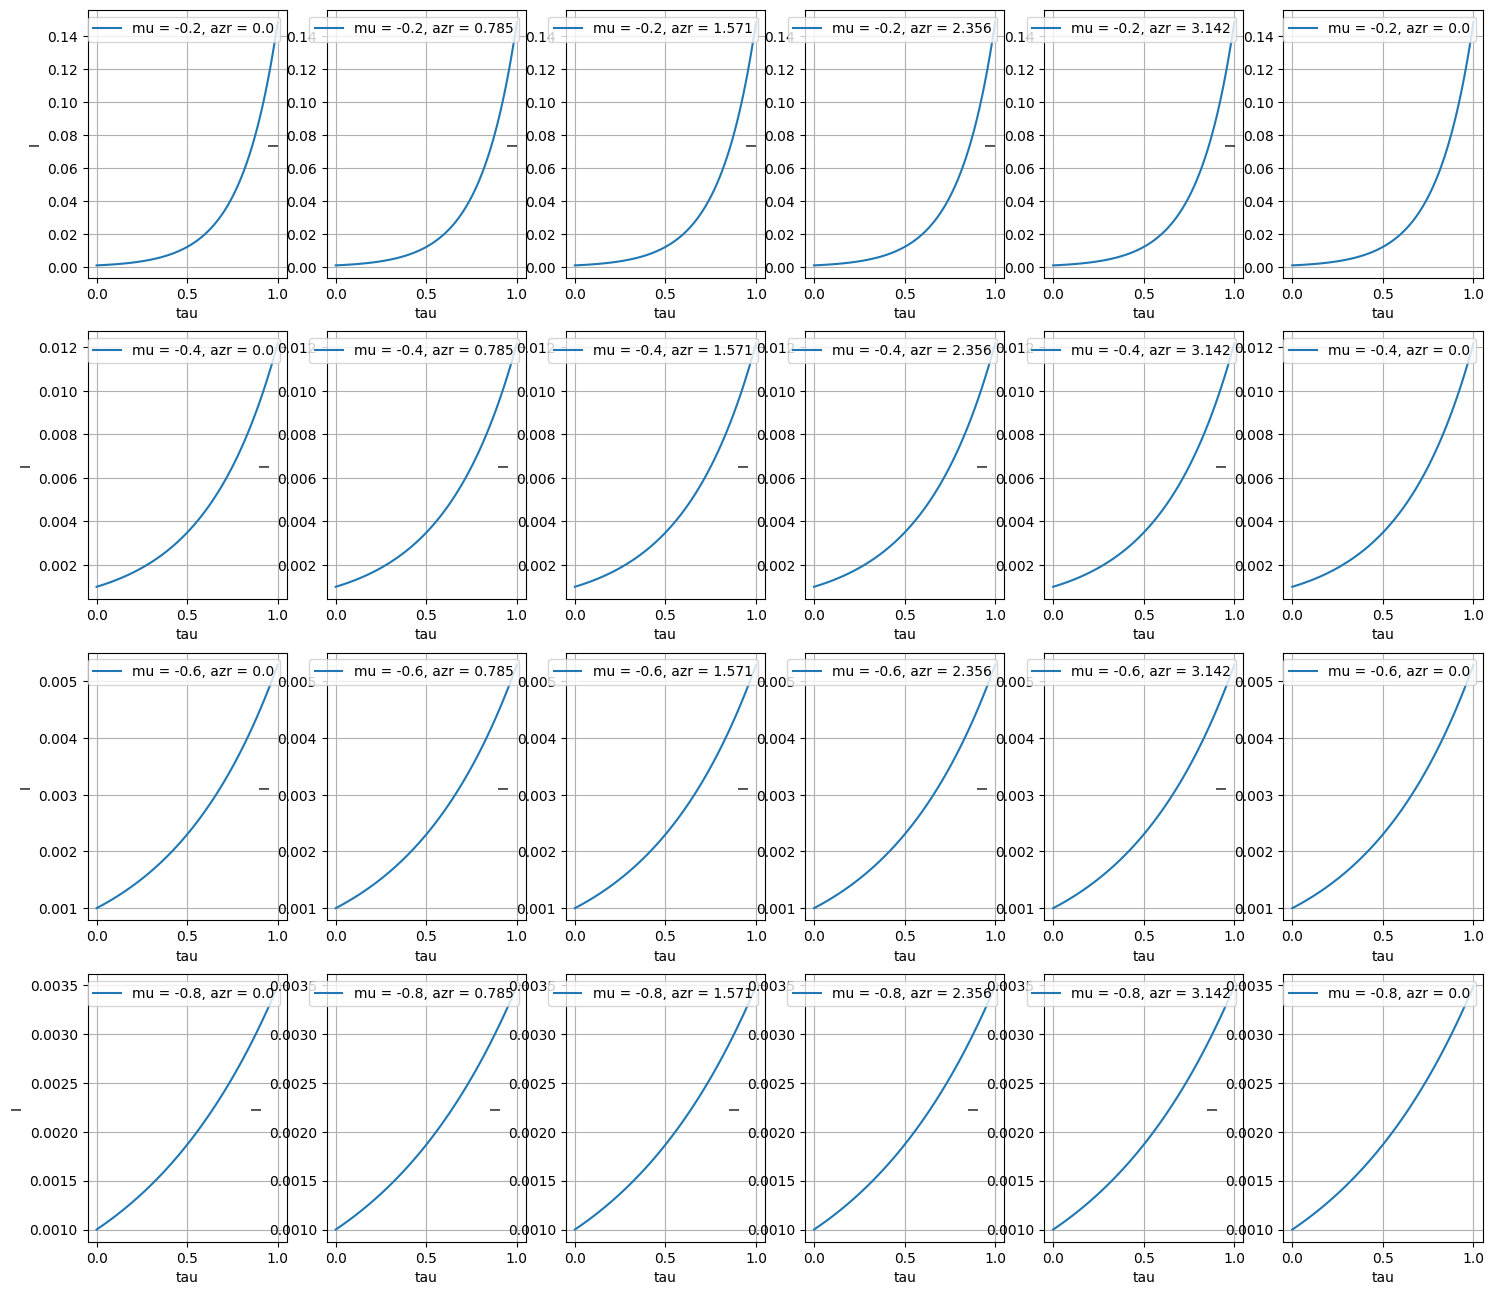

In [3]:
def dydx(x, y, mu, azr):   #nu is cos(theta) where theta is the angle between the direction of the incident light and scattered light
    sza = 45.0
    mu0= np.cos(np.radians(sza))
    g= -1
    I0= 1.0
    w0= 0.99999999
    P = (0.5*(1-g**2))/((1+g**2-2*g*cos_theta(mu, mu0, azr))**1.5)
    return -y/mu + (w0/(4*np.pi*mu))*P*I0*np.exp(-x/mu0)     # defining the differential equation

def cos_theta(mu, mu0, azr): 
    smu = np.sqrt(1.0 - mu*mu)
    smu0 = np.sqrt(1.0 - mu0*mu0)
    nu = mu*mu0 + smu*smu0*np.cos(azr)
    return nu

azd = np.array([0.0, 45.0, 90.0, 135.0, 180,0])
azr= np.radians(azd)
mu= np.linspace(-0.2, -0.8, num=4)

x0 = 0.0        # initial value of x
xn = 1.0        # final value of x
y0 = 0.001    #not sure    # initial value of y
nlr = 100      # number of steps

ticks = ['*', 'o', 's', 'D']    # markers for the plot
h = (xn-x0)/nlr      # step sizes


plt.figure(figsize=(18, 16))
plot_no = 1
for i in range(len(mu)):
    for j in range(len(azr)):
        X, Y = RK4_1D_ode(dydx, y0, x0, xn, h, mu[i], azr[j])       # solving the differential equation using RK4 method
        plt.subplot(len(mu), len(azr), plot_no)
        plt.plot(X, Y, label = r'mu = %s, azr = %s' % (round(mu[i],3), round(azr[j],3)))    # plotting the solution
        plt.xlabel("tau")
        plt.ylabel("I")
        plt.grid()
        plt.legend() 
        plot_no += 1

plt.show()



(4, 6, 100)
(6, 100)


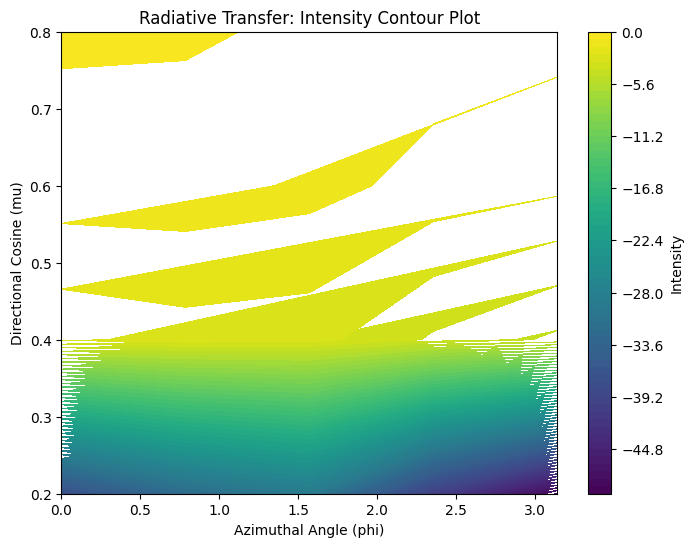

In [4]:
## checking for reighleigh scattering


import matplotlib.pyplot as plt
import numpy as np

def cos_theta(mu, mu0, azr): 
    smu = np.sqrt(1.0 - mu*mu)
    smu0 = np.sqrt(1.0 - mu0*mu0)
    nu = mu*mu0 + smu*smu0*np.cos(azr)
    return nu


def calculate_intensity(mu, tau, phi):
    """
    Calculates intensity using the discrete ordinates method considering absorption and single scattering.
    
    Parameters:
        mu (float): Directional cosine.
        tau (float): Optical thickness.
        phi (float): Azimuthal angle (in radians).
        source (float): Source term.
        scattering_coefficient (float): Scattering coefficient.
        albedo (float): Single scattering albedo.
    
    Returns:
        intensity (float): Intensity at given direction.
    """
    sza = 45.0
    mu0= np.cos(np.radians(sza))
    # g= -1
    I0= 1.0
    albedo= 0.99999999
    nu = cos_theta(mu, mu0, phi)   # this is cos of scattering angle
    p = 3/4*(1+ nu**2)
    intensity = (albedo/4*np.pi)*I0* p*mu0/(mu0 + mu)*(1.0 - np.exp(-tau/mu - tau/mu0))
    return intensity


# azd = np.array([0.0, 45.0, 90.0, 135.0, 180,0])
# azr= np.radians(azd)
# mu= np.linspace(-0.2, -0.8, num=4)

tau_values = np.linspace(0, 1, 100)  # Optical thickness values
#mu_values = np.linspace(0.2, 1, 4)  # Directional cosine values
#phi_values = np.linspace(0, np.pi, 5)  # Azimuthal angles (0 to pi radians)
mu_values = np.linspace(-0.2, -0.8, num=4)
azd = np.array([0.0, 45.0, 90.0, 135.0, 180,0])
phi_values= np.radians(azd)


def radiative_transfer_solver(tau_values, mu_values, phi_values):
    """
    Solves radiative transfer equation for given optical thicknesses, directions, and scattering parameters.
    
    Parameters:
        tau_values (array): Array of optical thicknesses.
        mu_values (array): Array of directional cosines.
        phi_values (array): Array of azimuthal angles (in radians).
        source (float): Source term.
        scattering_coefficient (float): Scattering coefficient.
        albedo (float): Single scattering albedo.
    
    Returns:
        intensity_values (array): Array of intensities for each tau, mu, and phi combination.
    """
    intensity_values = np.zeros((len(mu_values), len(phi_values), len(tau_values)))
    for i, mu in enumerate(mu_values):
        for j, phi in enumerate(phi_values):
            for k, tau in enumerate(tau_values):
                intensity_values[i, j, k] = calculate_intensity(mu, tau, phi)
    return intensity_values

def plot_intensity(intensity_values, mu_values, phi_values, tau_values):
    """
    Plots the intensity distribution.
    
    Parameters:
        intensity_values (array): Array of intensities for each tau, mu, and phi combination.
        mu_values (array): Array of directional cosines.
        phi_values (array): Array of azimuthal angles (in radians).
        tau_values (array): Array of optical thicknesses.
    """
    fig, axs = plt.subplots(len(mu_values), len(phi_values), figsize=(15, 10), sharex=True, sharey=True)
    for i, mu in enumerate(mu_values):
        for j, phi in enumerate(phi_values):
            axs[i, j].plot(tau_values, intensity_values[i, j, :], label=f'mu={round(mu, 4)}, phi={round(phi, 4)}')
            axs[i, j].set_xlabel('Optical Thickness (tau)')
            axs[i, j].set_ylabel('Intensity')
            axs[i, j].legend()
    plt.suptitle('Radiative Transfer: Intensity vs Optical Thickness')
    plt.tight_layout()
    plt.show()

#
intensity_values = radiative_transfer_solver(tau_values, mu_values, phi_values)
print(intensity_values.shape)
print(intensity_values[0, :, :].shape)


#plot_intensity(intensity_values, mu_values, phi_values, tau_values)



plt.figure(figsize=(8, 6))
plt.contourf(phi_values, -mu_values, intensity_values[:, :, 99])
contour_levels = 60  
plt.contourf(phi_values, -mu_values, intensity_values[:, :, 99], levels=contour_levels, cmap='viridis')  
plt.xlabel('Azimuthal Angle (phi)')
plt.ylabel('Directional Cosine (mu)')
plt.title('Radiative Transfer: Intensity Contour Plot')
plt.colorbar(label='Intensity')
plt.show()





# Same code as theirs written here in a slightly simplified manner

Aerosol:


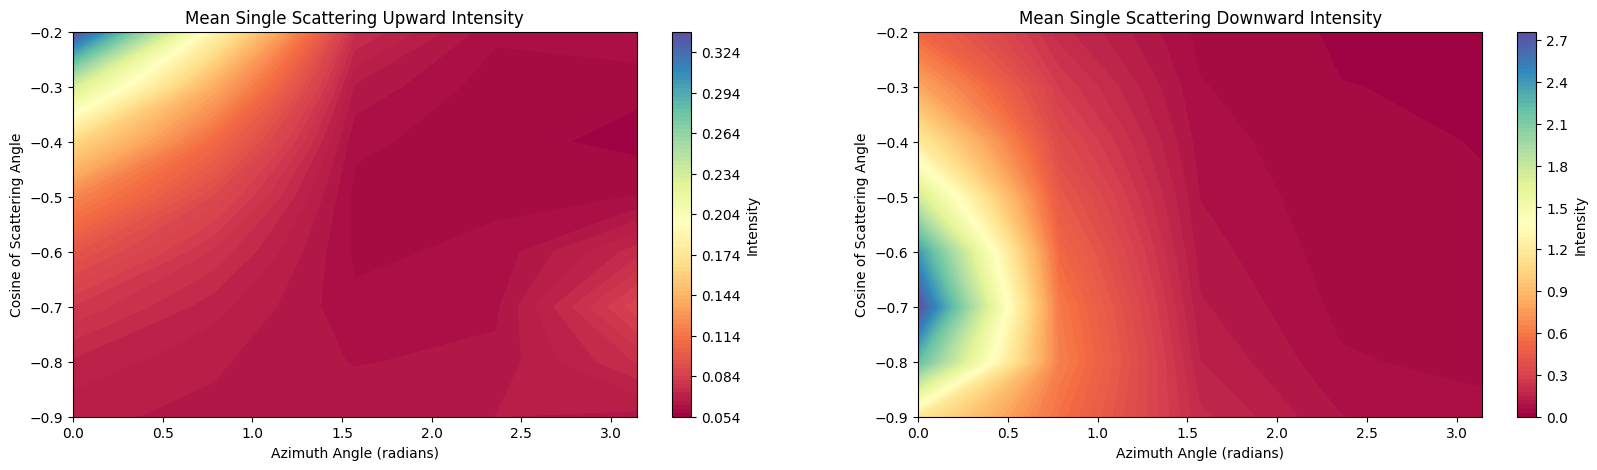

In [5]:
import matplotlib.pyplot as plt
import numpy as np

def legendre_polynomial(x, kmax):
    nk = kmax+1
    pk = np.zeros(nk)
    if kmax == 0:
        pk[0] = 1.0
    elif kmax == 1:
        pk[0] = 1.0
        pk[1] = x
    else:
        pk[0] = 1.0
        pk[1] = x
        for ik in range(2, nk):
            pk[ik] = (2.0 - 1.0/ik)*x*pk[ik-1] - (1.0 - 1.0/ik)*pk[ik-2]
    return pk

def single_scattering_up(mu, mu0, azr, tau0, xk):
    nk = len(xk)
    smu = np.sqrt(1.0 - mu*mu)
    smu0 = np.sqrt(1.0 - mu0*mu0)
    nu = mu*mu0 + smu*smu0*np.cos(azr)
    p = np.zeros_like(nu)
    for inu, nui in enumerate(nu):
        pk = legendre_polynomial(nui, nk-1)
        p[inu] = np.dot(xk, pk)
    mup = -mu
    I11up = p*mu0/(mu0 + mup)*(1.0 - np.exp(-tau0/mup - tau0/mu0))
    return I11up

def single_scattering_down(mu, mu0, azr, tau0, xk):
    nk = len(xk)
    tiny = 1.0e-8
    smu = np.sqrt(1.0 - mu*mu)
    smu0 = np.sqrt(1.0 - mu0*mu0)
    nu = mu*mu0 + smu*smu0*np.cos(azr)
    p = np.zeros_like(nu)
    for inu, nui in enumerate(nu):
        pk = legendre_polynomial(nui, nk-1)
        p[inu] = np.dot(xk, pk)
    if np.abs(mu - mu0) < tiny:
        I11dn = p*tau0*np.exp(-tau0/mu0)/mu0
    else:
        I11dn = p*mu0/(mu0 - mu)*(np.exp(-tau0/mu0) - np.exp(-tau0/mu))
    return I11dn

# Parameters
ssa = 0.99999999
sza = 45.0
muup = np.linspace(-0.2, -0.9, num=8)
azd = np.array([0.0, 45.0, 90.0, 135.0, 180.0])
print("Aerosol:")
nm = 10
xk = np.array([1.000000, 2.084911, 2.459134, 2.234752, \
                1.873098, 1.492956, 1.164725, 0.881976, \
                0.689172, 0.506016, 0.402247, 0.289742, \
                0.232980, 0.165427, 0.133290, 0.093127, \
                0.074444, 0.050682, 0.039800, 0.025983, \
                0.019929, 0.012274, 0.009257, 0.005312, \
                0.004015, 0.002120, 0.001638, 0.000764, \
                0.000602, 0.000211, 0.000178, 0.000033, \
                0.000037, 0.000004, 0.000005, 0.000000])
srfa = 0.3     # surface albedo
icol = 4 
nlr = 100
dtau = 0.01

mu0 = np.cos(np.radians(sza))
mudn = -muup
azr = np.radians(azd)

# Compute Single Scattering at TOA & BOA
Itoa = np.zeros((len(muup), len(azd)))
if srfa > 0.0:
    for imu, mu in enumerate(muup):
        Itoa[imu, :] = single_scattering_up(mu, mu0, azr, nlr*dtau, 0.5*ssa*xk) + \
                           2.0*srfa*mu0*np.exp(-nlr*dtau/mu0)*np.exp(nlr*dtau/mu)
else:
    for imu, mu in enumerate(muup):
        Itoa[imu, :] = single_scattering_up(mu, mu0, azr, nlr*dtau, 0.5*ssa*xk)

Iboa = np.zeros((len(mudn), len(azd)))      
for imu, mu in enumerate(mudn):
    Iboa[imu, :] = single_scattering_down(mu, mu0, azr, nlr*dtau, 0.5*ssa*xk)

# Plotting the result
plt.figure(figsize=(20, 5))
plt.subplot(1, 2, 1)
plt.contourf(azr, muup, Itoa, 100, cmap='Spectral')
plt.colorbar(label='Intensity')
plt.xlabel('Azimuth Angle (radians)')
plt.ylabel('Cosine of Scattering Angle')
plt.title('Mean Single Scattering Upward Intensity')

plt.subplot(1, 2, 2)
plt.contourf(azr, muup, Iboa, 100, cmap='Spectral')
plt.colorbar(label='Intensity')
plt.xlabel('Azimuth Angle (radians)')
plt.ylabel('Cosine of Scattering Angle')
plt.title('Mean Single Scattering Downward Intensity')
plt.show()


# My code for Rayleigh scattering using Henyey-Greenstein function


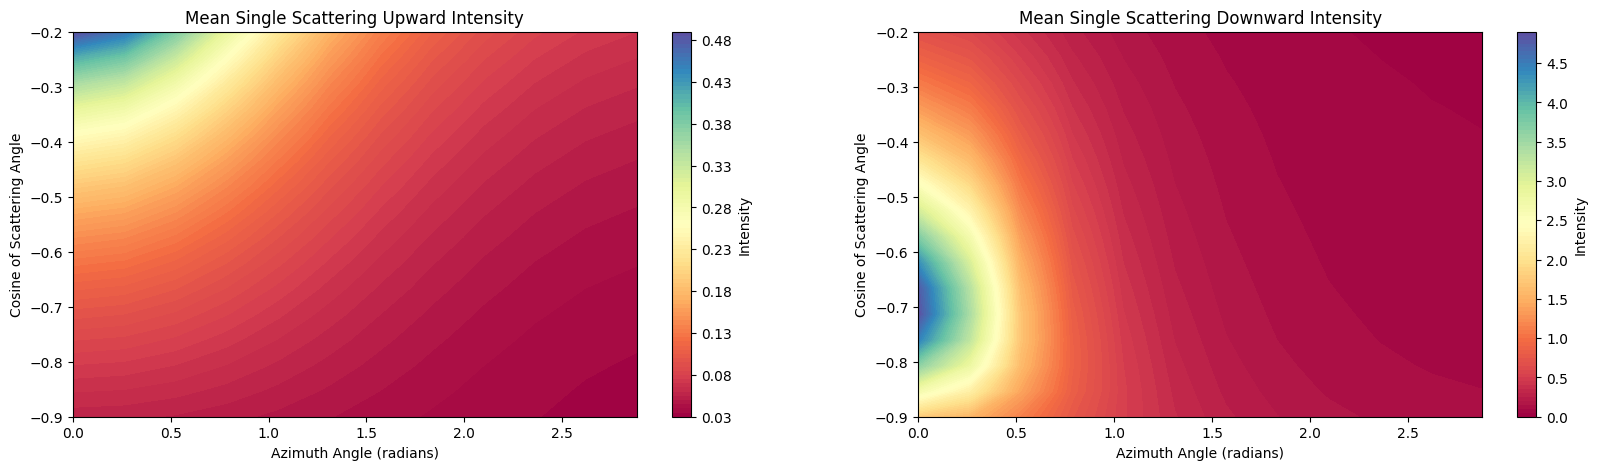

In [6]:
import matplotlib.pyplot as plt
import numpy as np

def henyey_greenstein(mu, g):
    return (1.0 - g**2) / (1.0 + g**2 - 2.0 * g * mu)**(3/2)

def single_scattering_up(mu, mu0, azr, tau0, xk, g):
    nk = len(xk)
    smu = np.sqrt(1.0 - mu*mu)
    smu0 = np.sqrt(1.0 - mu0*mu0)
    nu = mu*mu0 + smu*smu0*np.cos(azr)
    p = np.zeros_like(nu)
    for inu, nui in enumerate(nu):
        hk = henyey_greenstein(nui, g)
        p[inu] = np.sum(xk * hk)  # Sum the result of the dot product
    mup = -mu
    I11up = p*mu0/(mu0 + mup)*(1.0 - np.exp(-tau0/mup - tau0/mu0))
    return I11up

def single_scattering_down(mu, mu0, azr, tau0, xk, g):
    nk = len(xk)
    tiny = 1.0e-8
    smu = np.sqrt(1.0 - mu*mu)
    smu0 = np.sqrt(1.0 - mu0*mu0)
    nu = mu*mu0 + smu*smu0*np.cos(azr)
    p = np.zeros_like(nu)
    for inu, nui in enumerate(nu):
        hk = henyey_greenstein(nui, g)
        p[inu] = np.sum(xk * hk)  # Sum the result of the dot product
    if np.abs(mu - mu0) < tiny:
        I11dn = p*tau0*np.exp(-tau0/mu0)/mu0
    else:
        I11dn = p*mu0/(mu0 - mu)*(np.exp(-tau0/mu0) - np.exp(-tau0/mu))
    return I11dn

# Parameters
ssa = 0.99999999
sza = 45.0
muup = np.linspace(-0.2, -0.9, num=16)
azd = np.arange(0.0, 180.0, 15)
nm = 3
xk = np.array([1.0, 0.0, 0.5])
srfa = 0.0
nlr = 100
dtau = 0.01
g = 0.7  # Henyey-Greenstein asymmetry parameter

mu0 = np.cos(np.radians(sza))
mudn = -muup
azr = np.radians(azd)

# Compute Single Scattering at TOA & BOA
Itoa = np.zeros((len(muup), len(azd)))
if srfa > 0.0:
    for imu, mu in enumerate(muup):
        Itoa[imu, :] = single_scattering_up(mu, mu0, azr, nlr*dtau, 0.5*ssa*xk, g) + \
                           2.0*srfa*mu0*np.exp(-nlr*dtau/mu0)*np.exp(nlr*dtau/mu)
else:
    for imu, mu in enumerate(muup):
        Itoa[imu, :] = single_scattering_up(mu, mu0, azr, nlr*dtau, 0.5*ssa*xk, g)

Iboa = np.zeros((len(mudn), len(azd)))      
for imu, mu in enumerate(mudn):
    Iboa[imu, :] = single_scattering_down(mu, mu0, azr, nlr*dtau, 0.5*ssa*xk, g)

# Plotting the result
plt.figure(figsize=(20, 5))
plt.subplot(1, 2, 1)
plt.contourf(azr, muup, Itoa, 100, cmap='Spectral')
plt.colorbar(label='Intensity')
plt.xlabel('Azimuth Angle (radians)')
plt.ylabel('Cosine of Scattering Angle')
plt.title('Mean Single Scattering Upward Intensity')

plt.subplot(1, 2, 2)
plt.contourf(azr, muup, Iboa, 100, cmap='Spectral')
plt.colorbar(label='Intensity')
plt.xlabel('Azimuth Angle (radians)')
plt.ylabel('Cosine of Scattering Angle')
plt.title('Mean Single Scattering Downward Intensity')
plt.show()


# My code incorporating wavelength between 0.55 microns

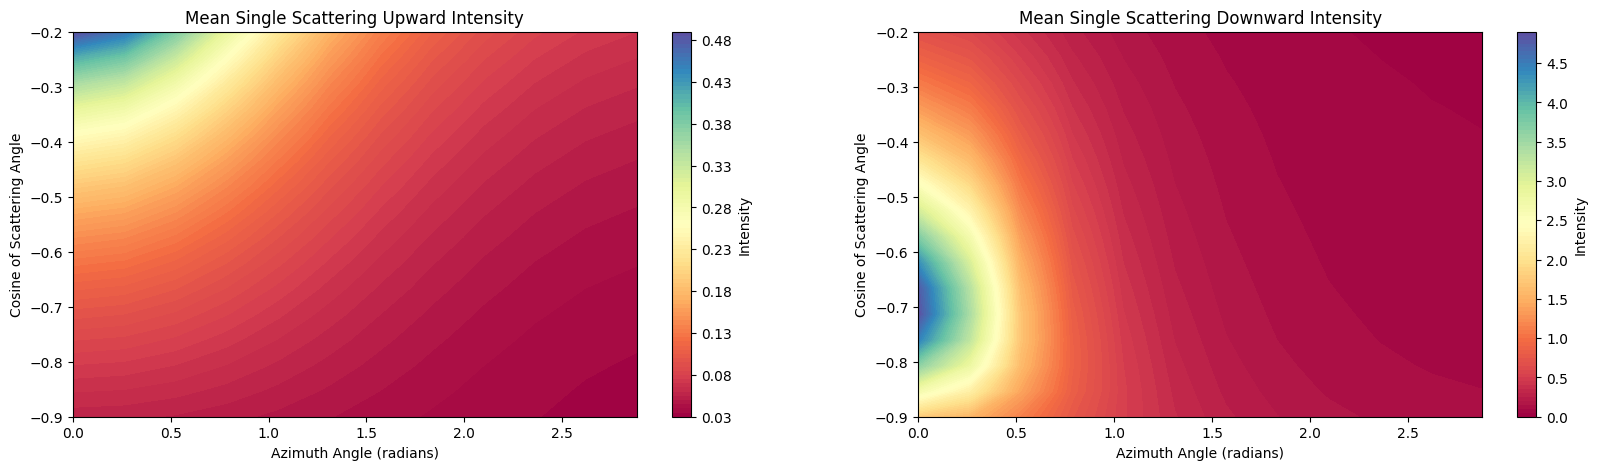

In [7]:
import matplotlib.pyplot as plt
import numpy as np

def henyey_greenstein(mu, g):
    return (1.0 - g**2) / (1.0 + g**2 - 2.0 * g * mu)**(3/2)

def scattering_cross_section(wavelength):
    # Rayleigh scattering cross-section proportional to λ⁻⁴
    return (550 / wavelength)**4

def single_scattering_up(mu, mu0, azr, tau0, xk, g, wavelength):
    nk = len(xk)
    smu = np.sqrt(1.0 - mu*mu)
    smu0 = np.sqrt(1.0 - mu0*mu0)
    nu = mu*mu0 + smu*smu0*np.cos(azr)
    p = np.zeros_like(nu)
    for inu, nui in enumerate(nu):
        hk = henyey_greenstein(nui, g)
        p[inu] = np.sum(xk * hk)  # Sum the result of the dot product
    mup = -mu
    sigma_s = scattering_cross_section(wavelength)
    I11up = p * mu0 / (mu0 + mup) * (1.0 - np.exp(-tau0 / mup - tau0 / mu0)) * sigma_s
    return I11up

def single_scattering_down(mu, mu0, azr, tau0, xk, g, wavelength):
    nk = len(xk)
    tiny = 1.0e-8
    smu = np.sqrt(1.0 - mu*mu)
    smu0 = np.sqrt(1.0 - mu0*mu0)
    nu = mu*mu0 + smu*smu0*np.cos(azr)
    p = np.zeros_like(nu)
    for inu, nui in enumerate(nu):
        hk = henyey_greenstein(nui, g)
        p[inu] = np.sum(xk * hk)  # Sum the result of the dot product
    if np.abs(mu - mu0) < tiny:
        I11dn = p * tau0 * np.exp(-tau0 / mu0) / mu0
    else:
        I11dn = p * mu0 / (mu0 - mu) * (np.exp(-tau0 / mu0) - np.exp(-tau0 / mu)) * scattering_cross_section(wavelength)
    return I11dn

# Parameters
ssa = 0.99999999
sza = 45.0
muup = np.linspace(-0.2, -0.9, num=16)
azd = np.arange(0.0, 180.0, 15)
nm = 3
xk = np.array([1.0, 0.0, 0.5])
srfa = 0.0
nlr = 100
dtau = 0.01
g = 0.7  # Henyey-Greenstein asymmetry parameter
wavelength = 550  # Wavelength in nanometers

mu0 = np.cos(np.radians(sza))
mudn = -muup
azr = np.radians(azd)

# Compute Single Scattering at TOA & BOA
Itoa = np.zeros((len(muup), len(azd)))
if srfa > 0.0:
    for imu, mu in enumerate(muup):
        Itoa[imu, :] = single_scattering_up(mu, mu0, azr, nlr * dtau, 0.5 * ssa * xk, g, wavelength) + \
                       2.0 * srfa * mu0 * np.exp(-nlr * dtau / mu0) * np.exp(nlr * dtau / mu)
else:
    for imu, mu in enumerate(muup):
        Itoa[imu, :] = single_scattering_up(mu, mu0, azr, nlr * dtau, 0.5 * ssa * xk, g, wavelength)

Iboa = np.zeros((len(mudn), len(azd)))
for imu, mu in enumerate(mudn):
    Iboa[imu, :] = single_scattering_down(mu, mu0, azr, nlr * dtau, 0.5 * ssa * xk, g, wavelength)

# Plotting the result
plt.figure(figsize=(20, 5))
plt.subplot(1, 2, 1)
plt.contourf(azr, muup, Itoa, 100, cmap='Spectral')
plt.colorbar(label='Intensity')
plt.xlabel('Azimuth Angle (radians)')
plt.ylabel('Cosine of Scattering Angle')
plt.title('Mean Single Scattering Upward Intensity')

plt.subplot(1, 2, 2)
plt.contourf(azr, muup, Iboa, 100, cmap='Spectral')
plt.colorbar(label='Intensity')
plt.xlabel('Azimuth Angle (radians)')
plt.ylabel('Cosine of Scattering Angle')
plt.title('Mean Single Scattering Downward Intensity')
plt.show()
